   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

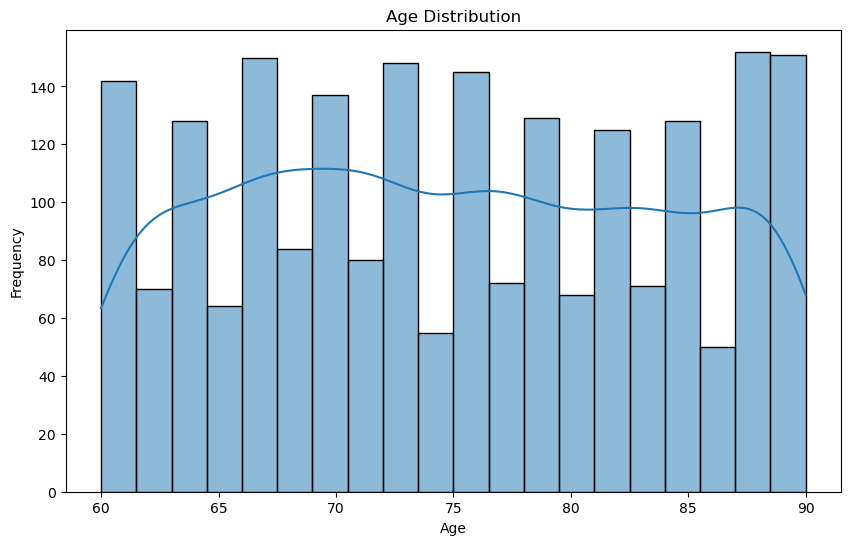

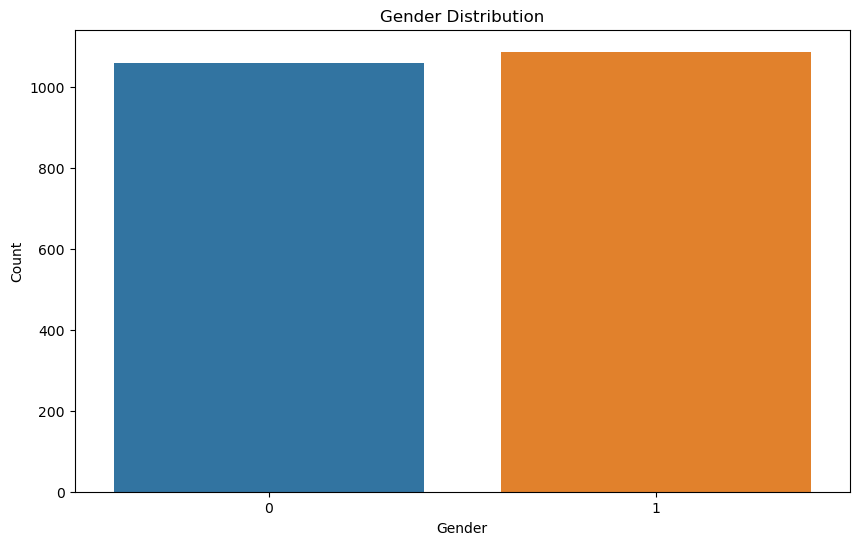

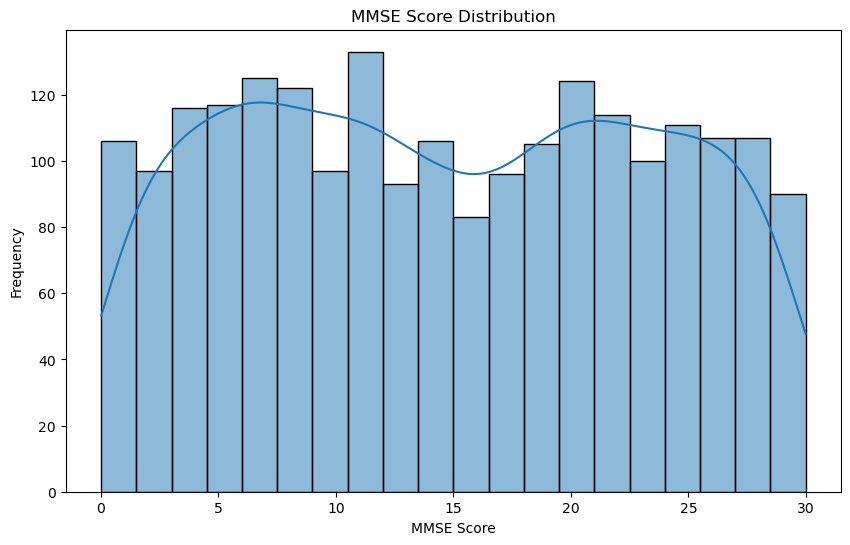

c:\Users\jaina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


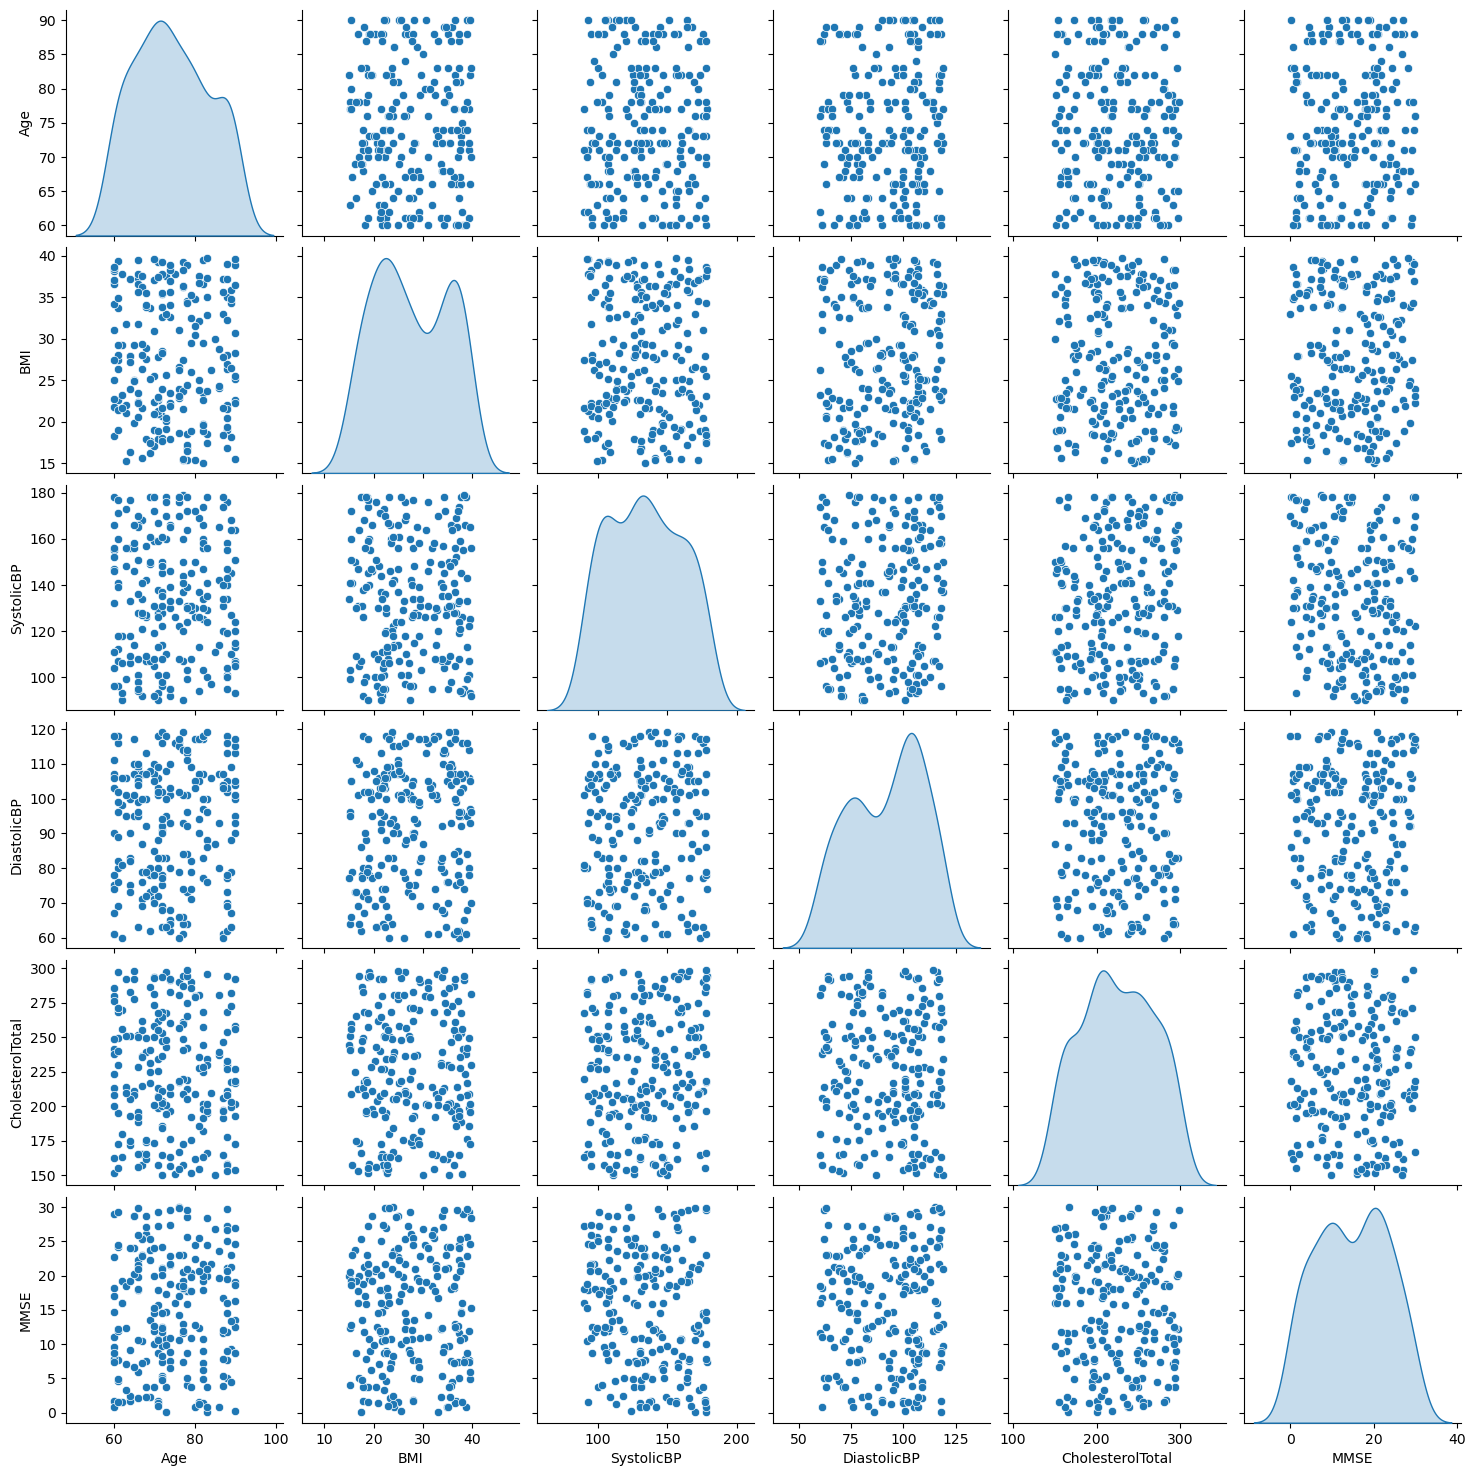

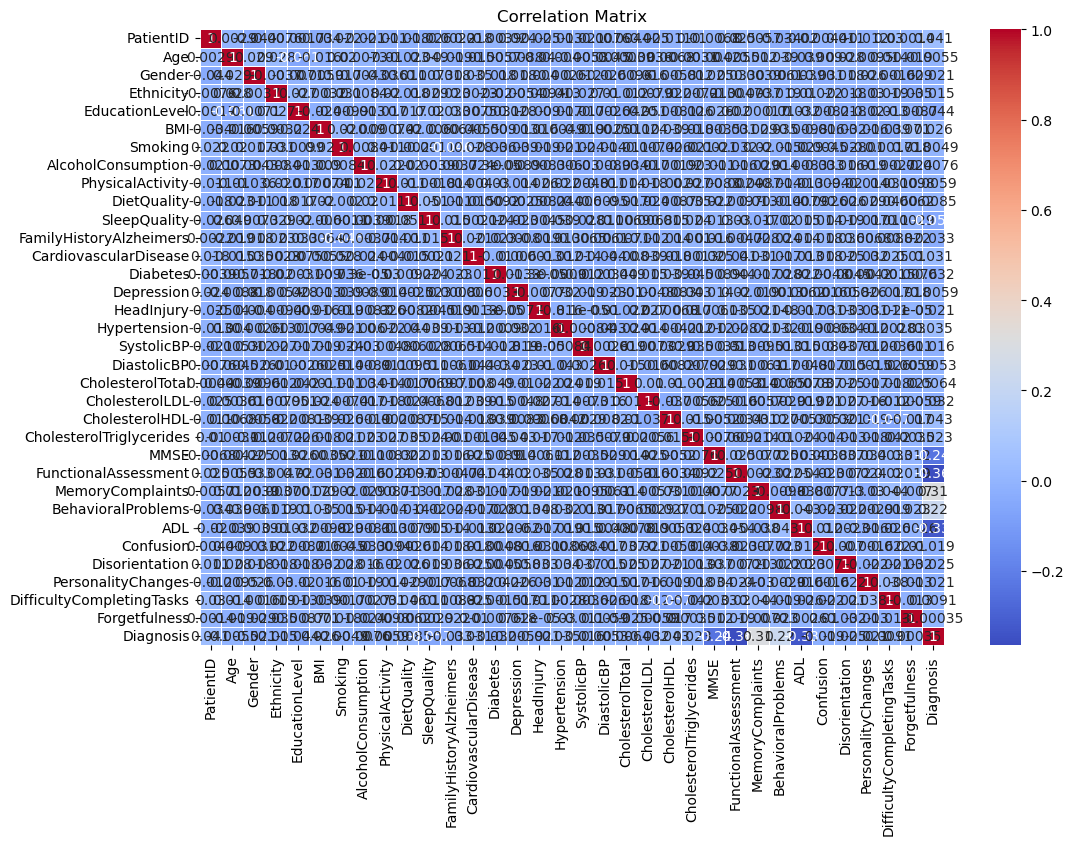

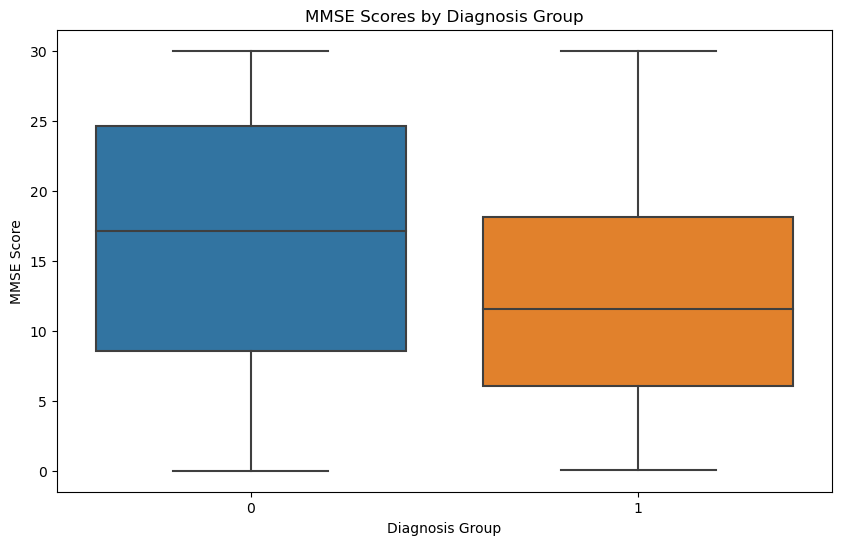

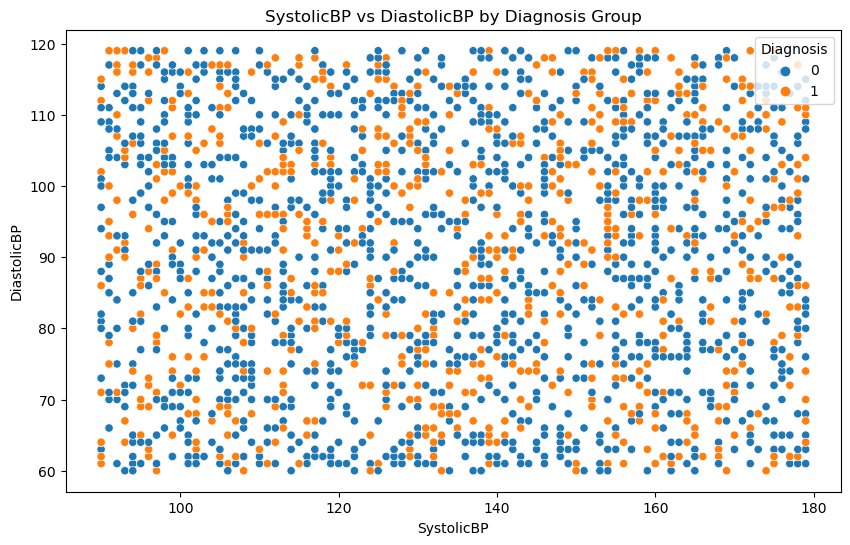

KNN Cross-Validation Accuracy: 0.7249720821813845 ± 0.019952718083979814
Logistic Regression Cross-Validation Accuracy: 0.838017021737952 ± 0.05212746897176803
Random Forest Cross-Validation Accuracy: 0.9264075459424298 ± 0.07528609531240746


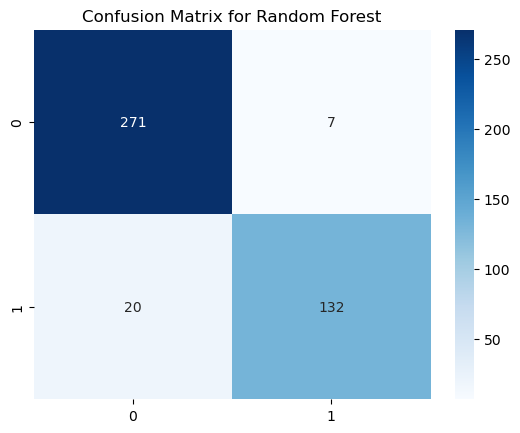

Random Forest Accuracy: 0.9372093023255814
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       278
         1.0       0.95      0.87      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



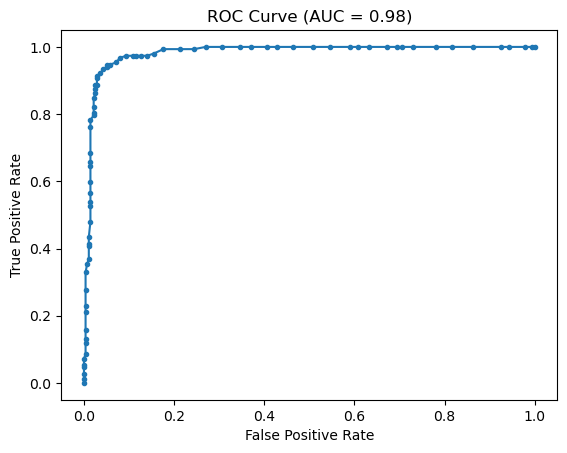

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9546,0.9897,0.9425,0.9315,0.9365,0.9012,0.9018,0.8360
gbc,Gradient Boosting Classifier,0.9476,0.9800,0.9227,0.9303,0.9258,0.8854,0.8861,0.2010
dt,Decision Tree Classifier,0.9360,0.9285,0.9029,0.9160,0.9091,0.8597,0.8602,0.0240
rf,Random Forest Classifier,0.9319,0.9805,0.8568,0.9463,0.8990,0.8478,0.8506,0.1440
ada,Ada Boost Classifier,0.9151,0.9484,0.8685,0.8922,0.8787,0.8134,0.8152,0.0850
et,Extra Trees Classifier,0.8517,0.9345,0.6924,0.8637,0.7664,0.6600,0.6702,0.1250
ridge,Ridge Classifier,0.8319,0.8984,0.7204,0.7892,0.7509,0.6247,0.6281,0.0190
lr,Logistic Regression,0.8313,0.8859,0.7087,0.7934,0.7467,0.6212,0.6250,1.9720
lda,Linear Discriminant Analysis,0.8313,0.8985,0.7286,0.7829,0.7526,0.6251,0.6279,0.0210
qda,Quadratic Discriminant Analysis,0.7976,0.8754,0.6876,0.7264,0.7049,0.5513,0.5531,0.0200


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
The best model selected by PyCaret is: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
Results Summary:
KNN Cross-Validation Accuracy: 0.7249720821813845 ± 0.

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
url = r'c:\Users\jaina\OneDrive\Desktop\KDD\Project\alzheimers_disease_data.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Print column names to verify them
print(data.columns)

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# MMSE score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['MMSE'], bins=20, kde=True)
plt.title('MMSE Score Distribution')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()

# Pairplot for numeric features (limiting the features and sampling the data)
sampled_data = data.sample(frac=0.1, random_state=42)  # Take a 10% sample
selected_features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'MMSE']  # Adjusted features
sns.pairplot(sampled_data[selected_features], diag_kind='kde')
plt.show()

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# MMSE Scores by Diagnosis Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='MMSE', data=data)
plt.title('MMSE Scores by Diagnosis Group')
plt.xlabel('Diagnosis Group')
plt.ylabel('MMSE Score')
plt.show()

# Scatter plot for SystolicBP vs DiastolicBP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SystolicBP', y='DiastolicBP', hue='Diagnosis', data=data)
plt.title('SystolicBP vs DiastolicBP by Diagnosis Group')
plt.xlabel('SystolicBP')
plt.ylabel('DiastolicBP')
plt.show()

# Replace any known invalid entries with NaN
data.replace('XXXConfid', np.nan, inplace=True)

# Drop columns with all missing values (if any)
data.dropna(axis=1, how='all', inplace=True)

# Impute missing values with the mean (or another strategy)
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

# Create a new DataFrame with the imputed data
data = pd.DataFrame(imputed_data, columns=data.columns)

# Ensure that categorical variables are encoded
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Splitting the dataset into features and target
X = data.drop(['Diagnosis'], axis=1)
y = data['Diagnosis']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the models
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)

# Cross-validation for KNN
skf = StratifiedKFold(n_splits=5)
cv_scores_knn = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores_knn.mean()} ± {cv_scores_knn.std()}")

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=skf, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean()} ± {cv_scores_log_reg.std()}")

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean()} ± {cv_scores_rf.std()}")

# Train and predict with Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation with Confusion Matrix and ROC Curve for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# ROC Curve and AUC Score
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# PyCaret for Automated Model Comparison
from pycaret.classification import *

# Setup PyCaret with the dataset
clf_setup = setup(data=data, target='Diagnosis',  # Replace with the actual target column name
                  train_size=0.8, session_id=123,
                  verbose=False, use_gpu=False)

# Compare models
best_model = compare_models()
print(best_model)

# Finalize the best model
final_model = finalize_model(best_model)

# Conclusion and Known Issues
# Summary of the best model selected
print(f"The best model selected by PyCaret is: {best_model}")

# Discuss the results
print("Results Summary:")
print(f"KNN Cross-Validation Accuracy: {cv_scores_knn.mean()} ± {cv_scores_knn.std()}")
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean()} ± {cv_scores_log_reg.std()}")
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean()} ± {cv_scores_rf.std()}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")






